In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, fftfreq, fftshift
from glob import glob
!{sys.executable} -m pip install tqdm
from tqdm import tqdm
import datetime
from time import perf_counter
from scipy.sparse.linalg import svds
from dasquakes import *

/bin/bash: {sys.executable}: command not found


In [2]:

#def get_fft(filename):
#    data_file=h5py.File(filename)
 #   data=data_file['/Acquisition/Raw[0]/RawData']
  #  downsample=20 #q=20
   # subseadata=data[::downsample,2450:3200]
   # ft=fftshift(fft2(subseadata))
    #f=fftshift(fftfreq(subseadata.shape[0],d=0.01*downsample))
    #k=fftshift(fftfreq(subseadata.shape[1],d=3.17))
    #return ft, f, k

In [3]:
#glob('/data/data6/whidbey/whidbey_2022-11-17_00-*-39_UTC.h5')

In [4]:
#filename='/data/data6/whidbey/whidbey_2022-11-17_00-00-39_UTC.h5'
#ft,f,k=get_fft(filename)

In [5]:
#plt.imshow(np.log10(np.abs(ft)), extent=[k[0],k[-1],f[0],f[-1]], aspect='auto')
#plt.ylim(-4,4)
#plt.show()

In [6]:
#ft.shape

In [7]:
#ft.flatten().shape

In [3]:
#definition of variables

q = 20         # decimation factor
N = 1000 # number of samples to analyze
dt = 60          # number of minutes between samples
nt = int(6000/q) # Number of time steps in each sample
nx = 375         # Number of subsea channels at Whidbey
D = np.zeros((nx*nt,N))
t = []
start_time=datetime.datetime(2022, 7, 1, 0, 0, 0)

In [4]:
#loop to read many files and calculate fk
#the variable this column is saving each ft
#i is the contador of the loop
for i in tqdm(range(N)):
        this_time = start_time + i*datetime.timedelta(minutes=dt)
        t.append(this_time)
        ft,f,k = fk_analysis(this_time,draw_figure=False,downsamplefactor=q,
                            record_length = 2)
        if len(ft) == 1:
            continue

        shape = ft.shape
        save_nt = shape[0]
        save_nx = shape[1]

        if  save_nt< nt:
            allft = np.zeros((nt,nx))
            allft[0:save_nt,0:nx] = np.abs(ft)
            this_column =  allft.flatten()
        elif save_nt > nt:
             allft= np.zeros((nt,nx))
             allft[0:nt,0:nx] = np.abs(ft[0:nt,0:nx])
             this_column =   allft.flatten()
        else:
            this_column = np.abs( ft.flatten() )
        D[:,i] = this_column
       
            

  0%|          | 1/1000 [00:01<21:44,  1.31s/it]

error'ed out


  0%|          | 3/1000 [00:01<07:37,  2.18it/s]

error'ed out
error'ed out


  0%|          | 4/1000 [00:01<06:02,  2.75it/s]

error'ed out


  0%|          | 5/1000 [00:02<05:11,  3.20it/s]

error'ed out


  1%|          | 6/1000 [00:02<04:40,  3.54it/s]

error'ed out


  1%|          | 7/1000 [00:02<04:19,  3.83it/s]

error'ed out


  1%|          | 8/1000 [00:02<04:06,  4.02it/s]

error'ed out


  1%|          | 9/1000 [00:03<03:58,  4.16it/s]

error'ed out


  1%|          | 12/1000 [00:03<03:31,  4.67it/s]

error'ed out
error'ed out
error'ed out


  1%|▏         | 13/1000 [00:03<03:26,  4.77it/s]

error'ed out


  2%|▏         | 15/1000 [00:04<03:21,  4.89it/s]

error'ed out
error'ed out


  2%|▏         | 17/1000 [00:04<03:18,  4.94it/s]

error'ed out
error'ed out


  2%|▏         | 19/1000 [00:05<03:16,  5.00it/s]

error'ed out
error'ed out


  2%|▏         | 21/1000 [00:05<03:15,  5.01it/s]

error'ed out
error'ed out


  2%|▏         | 23/1000 [00:05<03:14,  5.03it/s]

error'ed out
error'ed out


  2%|▏         | 24/1000 [00:06<03:14,  5.02it/s]

error'ed out


  3%|▎         | 27/1000 [00:06<03:17,  4.93it/s]

error'ed out
error'ed out
error'ed out


  3%|▎         | 28/1000 [00:06<03:18,  4.90it/s]

error'ed out


  3%|▎         | 30/1000 [00:07<03:15,  4.95it/s]

error'ed out
error'ed out


  3%|▎         | 32/1000 [00:07<03:13,  4.99it/s]

error'ed out
error'ed out


  3%|▎         | 34/1000 [00:08<03:13,  4.99it/s]

error'ed out
error'ed out


  4%|▎         | 36/1000 [00:08<03:12,  5.01it/s]

error'ed out
error'ed out


  4%|▍         | 38/1000 [00:08<03:10,  5.06it/s]

error'ed out
error'ed out


  4%|▍         | 40/1000 [00:09<03:10,  5.05it/s]

error'ed out
error'ed out


  4%|▍         | 42/1000 [00:09<03:09,  5.06it/s]

error'ed out
error'ed out


  4%|▍         | 44/1000 [00:10<03:09,  5.05it/s]

error'ed out
error'ed out


  5%|▍         | 46/1000 [00:10<03:09,  5.02it/s]

error'ed out
error'ed out


  5%|▍         | 48/1000 [00:10<03:09,  5.03it/s]

error'ed out
error'ed out


  5%|▌         | 50/1000 [00:11<03:09,  5.02it/s]

error'ed out
error'ed out


  5%|▌         | 52/1000 [00:11<03:08,  5.02it/s]

error'ed out
error'ed out


  5%|▌         | 54/1000 [00:12<03:08,  5.02it/s]

error'ed out
error'ed out


  6%|▌         | 56/1000 [00:12<03:08,  5.02it/s]

error'ed out
error'ed out


  6%|▌         | 58/1000 [00:12<03:07,  5.03it/s]

error'ed out
error'ed out


  6%|▌         | 60/1000 [00:13<03:07,  5.03it/s]

error'ed out
error'ed out


  6%|▌         | 62/1000 [00:13<03:06,  5.02it/s]

error'ed out
error'ed out


  6%|▋         | 64/1000 [00:14<03:06,  5.03it/s]

error'ed out
error'ed out


  6%|▋         | 65/1000 [00:14<03:06,  5.02it/s]

error'ed out


  7%|▋         | 67/1000 [00:14<03:06,  5.00it/s]

error'ed out
error'ed out


  7%|▋         | 69/1000 [00:15<03:05,  5.01it/s]

error'ed out
error'ed out


  7%|▋         | 71/1000 [00:15<03:04,  5.03it/s]

error'ed out
error'ed out


  7%|▋         | 72/1000 [00:15<03:04,  5.02it/s]

error'ed out


  7%|▋         | 74/1000 [00:16<03:06,  4.97it/s]

error'ed out
error'ed out


  8%|▊         | 76/1000 [00:16<03:05,  4.99it/s]

error'ed out
error'ed out


  8%|▊         | 78/1000 [00:16<03:04,  5.01it/s]

error'ed out
error'ed out


  8%|▊         | 80/1000 [00:17<03:03,  5.03it/s]

error'ed out
error'ed out


  8%|▊         | 81/1000 [00:17<03:02,  5.02it/s]

error'ed out


  8%|▊         | 83/1000 [00:17<03:03,  5.00it/s]

error'ed out
error'ed out


  8%|▊         | 85/1000 [00:18<03:01,  5.04it/s]

error'ed out
error'ed out


  9%|▊         | 87/1000 [00:18<03:01,  5.02it/s]

error'ed out
error'ed out


  9%|▉         | 89/1000 [00:19<03:01,  5.03it/s]

error'ed out
error'ed out


  9%|▉         | 91/1000 [00:19<03:00,  5.03it/s]

error'ed out
error'ed out


  9%|▉         | 93/1000 [00:19<02:59,  5.04it/s]

error'ed out
error'ed out


 10%|▉         | 95/1000 [00:20<03:00,  5.02it/s]

error'ed out
error'ed out


 10%|▉         | 97/1000 [00:20<02:59,  5.02it/s]

error'ed out
error'ed out


 10%|▉         | 99/1000 [00:21<02:59,  5.02it/s]

error'ed out
error'ed out


 10%|█         | 101/1000 [00:21<02:58,  5.03it/s]

error'ed out
error'ed out


 10%|█         | 103/1000 [00:21<02:58,  5.02it/s]

error'ed out
error'ed out


 10%|█         | 105/1000 [00:22<02:58,  5.03it/s]

error'ed out
error'ed out


 11%|█         | 107/1000 [00:22<02:57,  5.04it/s]

error'ed out
error'ed out


 11%|█         | 109/1000 [00:23<02:56,  5.04it/s]

error'ed out
error'ed out


 11%|█         | 111/1000 [00:23<02:56,  5.05it/s]

error'ed out
error'ed out


 11%|█▏        | 113/1000 [00:23<02:56,  5.03it/s]

error'ed out
error'ed out


 12%|█▏        | 115/1000 [00:24<02:55,  5.04it/s]

error'ed out
error'ed out


 12%|█▏        | 117/1000 [00:24<02:55,  5.04it/s]

error'ed out
error'ed out


 12%|█▏        | 119/1000 [00:24<02:54,  5.04it/s]

error'ed out
error'ed out


 12%|█▏        | 121/1000 [00:25<02:55,  5.02it/s]

error'ed out
error'ed out


 12%|█▏        | 123/1000 [00:25<02:54,  5.03it/s]

error'ed out
error'ed out


 12%|█▎        | 125/1000 [00:26<02:54,  5.03it/s]

error'ed out
error'ed out


 13%|█▎        | 127/1000 [00:26<02:53,  5.04it/s]

error'ed out
error'ed out


 13%|█▎        | 129/1000 [00:26<02:52,  5.04it/s]

error'ed out
error'ed out


 13%|█▎        | 131/1000 [00:27<02:52,  5.04it/s]

error'ed out
error'ed out


 13%|█▎        | 133/1000 [00:27<02:51,  5.05it/s]

error'ed out
error'ed out


 14%|█▎        | 135/1000 [00:28<02:51,  5.04it/s]

error'ed out
error'ed out


 14%|█▎        | 137/1000 [00:28<02:51,  5.03it/s]

error'ed out
error'ed out


 14%|█▍        | 139/1000 [00:28<02:50,  5.05it/s]

error'ed out
error'ed out


 14%|█▍        | 141/1000 [00:29<02:50,  5.05it/s]

error'ed out
error'ed out


 14%|█▍        | 143/1000 [00:29<02:49,  5.05it/s]

error'ed out
error'ed out


 14%|█▍        | 145/1000 [00:30<02:49,  5.05it/s]

error'ed out
error'ed out


 15%|█▍        | 146/1000 [00:30<02:49,  5.04it/s]

error'ed out


 15%|█▍        | 147/1000 [00:30<02:51,  4.97it/s]

error'ed out


 15%|█▍        | 149/1000 [00:30<02:49,  5.02it/s]

error'ed out
error'ed out


 15%|█▌        | 151/1000 [00:31<02:46,  5.09it/s]

error'ed out
error'ed out


 15%|█▌        | 153/1000 [00:31<02:45,  5.10it/s]

error'ed out
error'ed out


 16%|█▌        | 155/1000 [00:32<02:44,  5.13it/s]

error'ed out
error'ed out


 16%|█▌        | 157/1000 [00:32<02:44,  5.14it/s]

error'ed out
error'ed out


 16%|█▌        | 159/1000 [00:32<02:43,  5.15it/s]

error'ed out
error'ed out


 16%|█▌        | 161/1000 [00:33<02:42,  5.16it/s]

error'ed out
error'ed out


 16%|█▋        | 163/1000 [00:33<02:42,  5.15it/s]

error'ed out
error'ed out


 16%|█▋        | 165/1000 [00:34<02:41,  5.17it/s]

error'ed out
error'ed out


 17%|█▋        | 167/1000 [00:34<02:41,  5.17it/s]

error'ed out
error'ed out


 17%|█▋        | 169/1000 [00:34<02:40,  5.18it/s]

error'ed out
error'ed out


 17%|█▋        | 171/1000 [00:35<02:39,  5.18it/s]

error'ed out
error'ed out


 17%|█▋        | 173/1000 [00:35<02:39,  5.17it/s]

error'ed out
error'ed out


 18%|█▊        | 175/1000 [00:36<02:39,  5.17it/s]

error'ed out
error'ed out


 18%|█▊        | 177/1000 [00:36<02:39,  5.16it/s]

error'ed out
error'ed out


 18%|█▊        | 179/1000 [00:36<02:38,  5.17it/s]

error'ed out
error'ed out


 18%|█▊        | 181/1000 [00:37<02:38,  5.17it/s]

error'ed out
error'ed out


 18%|█▊        | 183/1000 [00:37<02:37,  5.17it/s]

error'ed out
error'ed out


 18%|█▊        | 185/1000 [00:37<02:37,  5.18it/s]

error'ed out
error'ed out


 19%|█▊        | 187/1000 [00:38<02:37,  5.15it/s]

error'ed out
error'ed out


 19%|█▉        | 189/1000 [00:38<02:37,  5.16it/s]

error'ed out
error'ed out


 19%|█▉        | 191/1000 [00:39<02:36,  5.16it/s]

error'ed out
error'ed out


 19%|█▉        | 193/1000 [00:39<02:36,  5.17it/s]

error'ed out
error'ed out


 20%|█▉        | 195/1000 [00:39<02:35,  5.18it/s]

error'ed out
error'ed out


 20%|█▉        | 197/1000 [00:40<02:35,  5.17it/s]

error'ed out
error'ed out


 20%|█▉        | 199/1000 [00:40<02:34,  5.17it/s]

error'ed out
error'ed out


 20%|██        | 201/1000 [00:41<02:34,  5.18it/s]

error'ed out
error'ed out


 20%|██        | 203/1000 [00:41<02:34,  5.17it/s]

error'ed out
error'ed out


 20%|██        | 205/1000 [00:41<02:33,  5.17it/s]

error'ed out
error'ed out


 21%|██        | 207/1000 [00:42<02:33,  5.16it/s]

error'ed out
error'ed out


 21%|██        | 209/1000 [00:42<02:33,  5.16it/s]

error'ed out
error'ed out


 21%|██        | 211/1000 [00:42<02:32,  5.16it/s]

error'ed out
error'ed out


 21%|██▏       | 213/1000 [00:43<02:32,  5.17it/s]

error'ed out
error'ed out


 22%|██▏       | 215/1000 [00:43<02:32,  5.16it/s]

error'ed out
error'ed out


 22%|██▏       | 217/1000 [00:44<02:32,  5.13it/s]

error'ed out
error'ed out


 22%|██▏       | 219/1000 [00:44<02:32,  5.12it/s]

error'ed out
error'ed out


 22%|██▏       | 221/1000 [00:44<02:32,  5.11it/s]

error'ed out
error'ed out


 22%|██▏       | 223/1000 [00:45<02:32,  5.10it/s]

error'ed out
error'ed out


 22%|██▎       | 225/1000 [00:45<02:31,  5.10it/s]

error'ed out
error'ed out


 23%|██▎       | 227/1000 [00:46<02:32,  5.07it/s]

error'ed out
error'ed out


 23%|██▎       | 229/1000 [00:46<02:31,  5.08it/s]

error'ed out
error'ed out


 23%|██▎       | 231/1000 [00:46<02:30,  5.11it/s]

error'ed out
error'ed out


 23%|██▎       | 233/1000 [00:47<02:29,  5.13it/s]

error'ed out
error'ed out


 24%|██▎       | 235/1000 [00:47<02:28,  5.14it/s]

error'ed out
error'ed out


 24%|██▎       | 237/1000 [00:48<02:28,  5.14it/s]

error'ed out
error'ed out


 24%|██▍       | 239/1000 [00:48<02:27,  5.15it/s]

error'ed out
error'ed out


 24%|██▍       | 241/1000 [00:48<02:27,  5.15it/s]

error'ed out
error'ed out


 24%|██▍       | 243/1000 [00:49<02:26,  5.16it/s]

error'ed out
error'ed out


 24%|██▍       | 245/1000 [00:49<02:26,  5.16it/s]

error'ed out
error'ed out


 25%|██▍       | 247/1000 [00:49<02:25,  5.16it/s]

error'ed out
error'ed out


 25%|██▍       | 248/1000 [00:50<02:26,  5.12it/s]

error'ed out


 25%|██▍       | 249/1000 [00:50<02:32,  4.93it/s]

error'ed out


 25%|██▌       | 250/1000 [00:50<02:37,  4.78it/s]

error'ed out


 25%|██▌       | 251/1000 [00:50<02:40,  4.67it/s]

error'ed out


 25%|██▌       | 252/1000 [00:51<02:42,  4.61it/s]

error'ed out


 25%|██▌       | 253/1000 [00:51<02:43,  4.58it/s]

error'ed out


 26%|██▌       | 255/1000 [00:51<02:35,  4.78it/s]

error'ed out
error'ed out


 26%|██▌       | 256/1000 [00:51<02:33,  4.84it/s]

error'ed out


 26%|██▌       | 257/1000 [00:52<02:34,  4.80it/s]

error'ed out


 26%|██▌       | 258/1000 [00:52<02:33,  4.84it/s]

error'ed out


 26%|██▌       | 259/1000 [00:52<02:35,  4.78it/s]

error'ed out


 26%|██▌       | 260/1000 [00:52<02:35,  4.74it/s]

error'ed out


 26%|██▌       | 261/1000 [00:52<02:40,  4.62it/s]

error'ed out


 26%|██▌       | 262/1000 [00:53<02:41,  4.57it/s]

error'ed out


 26%|██▋       | 263/1000 [00:53<02:40,  4.60it/s]

error'ed out


 26%|██▋       | 265/1000 [00:53<02:33,  4.79it/s]

error'ed out
error'ed out


 27%|██▋       | 267/1000 [00:54<02:29,  4.90it/s]

error'ed out
error'ed out


 27%|██▋       | 269/1000 [00:54<02:27,  4.97it/s]

error'ed out
error'ed out


 27%|██▋       | 271/1000 [00:55<02:24,  5.05it/s]

error'ed out
error'ed out


 27%|██▋       | 273/1000 [00:55<02:22,  5.09it/s]

error'ed out
error'ed out


 28%|██▊       | 275/1000 [00:55<02:22,  5.09it/s]

error'ed out
error'ed out


 28%|██▊       | 277/1000 [00:56<02:21,  5.10it/s]

error'ed out
error'ed out


 28%|██▊       | 279/1000 [00:56<02:21,  5.11it/s]

error'ed out
error'ed out


 28%|██▊       | 281/1000 [00:56<02:20,  5.11it/s]

error'ed out
error'ed out


 28%|██▊       | 283/1000 [00:57<02:20,  5.11it/s]

error'ed out
error'ed out


 28%|██▊       | 285/1000 [00:57<02:20,  5.08it/s]

error'ed out
error'ed out


 29%|██▊       | 287/1000 [00:58<02:19,  5.11it/s]

error'ed out
error'ed out


 29%|██▉       | 289/1000 [00:58<02:18,  5.12it/s]

error'ed out
error'ed out


 29%|██▉       | 291/1000 [00:58<02:18,  5.13it/s]

error'ed out
error'ed out


 29%|██▉       | 293/1000 [00:59<02:17,  5.14it/s]

error'ed out
error'ed out


 30%|██▉       | 295/1000 [00:59<02:17,  5.13it/s]

error'ed out
error'ed out


 30%|██▉       | 297/1000 [01:00<02:17,  5.11it/s]

error'ed out
error'ed out


 30%|██▉       | 299/1000 [01:00<02:17,  5.09it/s]

error'ed out
error'ed out


 30%|███       | 301/1000 [01:00<02:17,  5.09it/s]

error'ed out
error'ed out


 30%|███       | 303/1000 [01:01<02:16,  5.10it/s]

error'ed out
error'ed out


 30%|███       | 305/1000 [01:01<02:16,  5.09it/s]

error'ed out
error'ed out


 31%|███       | 307/1000 [01:02<02:16,  5.09it/s]

error'ed out
error'ed out


 31%|███       | 309/1000 [01:02<02:15,  5.09it/s]

error'ed out
error'ed out


 31%|███       | 311/1000 [01:02<02:15,  5.08it/s]

error'ed out
error'ed out


 31%|███       | 312/1000 [01:03<02:15,  5.07it/s]

error'ed out


100%|██████████| 1000/1000 [12:17<00:00,  1.36it/s]


In [6]:
D.shape


(112500, 1000)

In [5]:
 U,S,V = svds(D)
S=np.diag(S)

U0 = np.array(U[:,2:5]).reshape((nt,3))
V0 = np.array(V[2:5,:]).reshape((3,nx))
S0 = S[2:5,2:5]

reconstruction = U0.dot(S0).dot(V0)

plt.subplots(1,2,figsize=(16,9))
plt.subplot(121)
plt.imshow(reconstruction,vmin=-0.1,vmax=0.1)

plt.subplot(122)
plt.imshow(D,vmin=-0.1,vmax=0.1)

plt.show()


ValueError: cannot reshape array of size 337500 into shape (300,3)

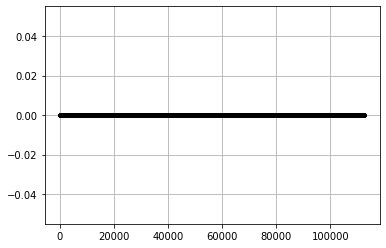

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(D[:,0], '.', color='k')
ax1.grid()

#CALCULATING SVD TO THIS D (JUST 250 )

In [13]:
#SINGULAR DESCOMPOSICION VALUES
ns = N
nPoints=ns
Davg = np.mean(D,axis=1)                  # Compute mean
B = D - np.tile(Davg,(nPoints,1)).T       # Mean-subtracted data
print(B.shape)

(112500, 3000)


In [14]:

#MAKING D a square matrix
U,S,V = svds( D[:,0:ns] )
S.shape

(6,)

In [15]:
import numpy.linalg as ln
import sys
!{sys.executable} -m pip install sklearn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
import sklearn 
from sklearn.decomposition import PCA

In [48]:
from sklearn.decomposition import PCA # this is the SKLEAN model
#pca=PCA(n_components=3).fit(D.transpose())
pca=PCA(n_components=3).fit(D)# retain all 3 components
#pca=PCA().fit(D.transpose())# retain all 3 components
print(pca)

PCA(n_components=3)


In [49]:
print(pca.components_)

[[ 6.85186079e-30  4.05674158e-36  7.83047455e-35 ...  8.67976729e-03
   7.98469207e-03  7.54733331e-03]
 [ 4.39098256e-18 -4.02996930e-24  2.64499395e-26 ... -8.22833767e-05
  -1.40558589e-04 -2.29895959e-04]
 [-1.38843005e-17 -1.54425959e-18  1.02079328e-20 ...  1.52746105e-02
   1.21454101e-02  1.29262114e-02]]


In [50]:
len(pca.components_)

3

In [51]:
print(pca.explained_variance_ratio_)

[0.73292918 0.02536843 0.00448987]


In [21]:
# The 3 PCs' explained variance
print(pca.explained_variance_)

[1.13836857e+09 3.94016558e+07 6.97356609e+06]


In [22]:

import math
azimuth=math.degrees(math.atan2(pca.components_[0][0],pca.components_[0][1]))
if azimuth <0:azimuth+=360
print("direction of the plate ",azimuth," degrees from North")

direction of the plate  89.99970957655763  degrees from North


[0.73292918 0.02536843 0.00448987]


Text(0.5, 1.0, 'Variance explained with cumulated PCs')

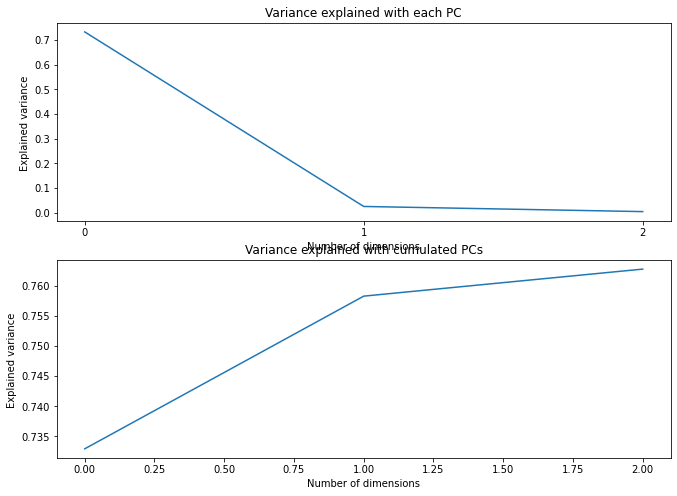

In [23]:
print(pca.explained_variance_ratio_)
fig,ax=plt.subplots(2,1,figsize=(11,8))
ax[0].plot(pca.explained_variance_ratio_);ax[0].set_xticks(range(0,3))
ax[0].set_xlabel('Number of dimensions')
ax[0].set_ylabel('Explained variance ')
ax[0].set_title('Variance explained with each PC')
ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Number of dimensions')
ax[1].set_ylabel('Explained variance ')
ax[1].set_title('Variance explained with cumulated PCs')

In [40]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.80) +1
print("minimum dimension size to explain 95% of the variance ",d)

minimum dimension size to explain 95% of the variance  1


original shape:    (112500, 3000)
PCA(n_components=1)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


transformed shape: (112500, 1)


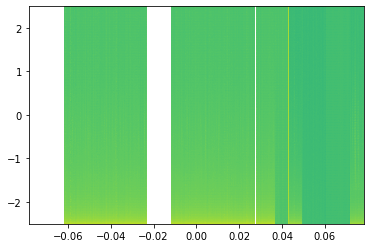

In [52]:
pca = PCA(n_components=d).fit(D)
D_pca = pca.transform(D)
print("original shape:   ", D.shape)
print(pca)
plt.imshow(np.log10(D),aspect='auto',extent=[k[0],k[-1],f[0],f[-1]])

print("transformed shape:", D_pca.shape)

In [46]:
D_new = pca.inverse_transform(D_pca)
print(D_new.shape)
plt.scatter(D[0,:], D[1,:], alpha=1)
plt.scatter(D_new[0,:], D_new[1,:], alpha=0.5)
plt.legend(['Original data','Reconstructed Data'])
plt.grid(True)
plt.show()

ValueError: shapes (112500,1) and (2,3000) not aligned: 1 (dim 1) != 2 (dim 0)